In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

df_train = pd.read_csv("dataset/train.csv")

print("Data loaded successfully")
print(f"Shape of the training data: {df_train.shape}")

df_train.head()

Data loaded successfully
Shape of the training data: (750000, 18)


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


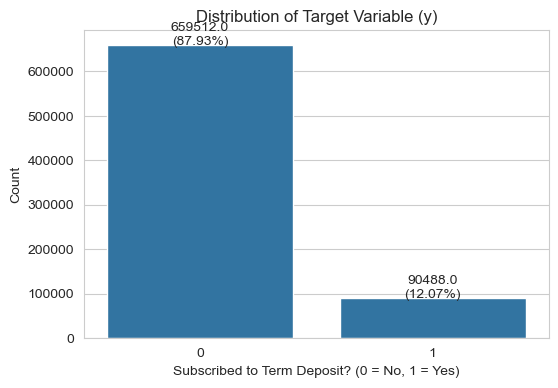

In [4]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='y', data=df_train)
plt.title("Distribution of Target Variable (y)")
plt.xlabel("Subscribed to Term Deposit? (0 = No, 1 = Yes)")
plt.ylabel("Count")

# Annotate bars with counts and percentage
total = len(df_train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{height}\n({height/total:.2%})', ha="center")

plt.show()

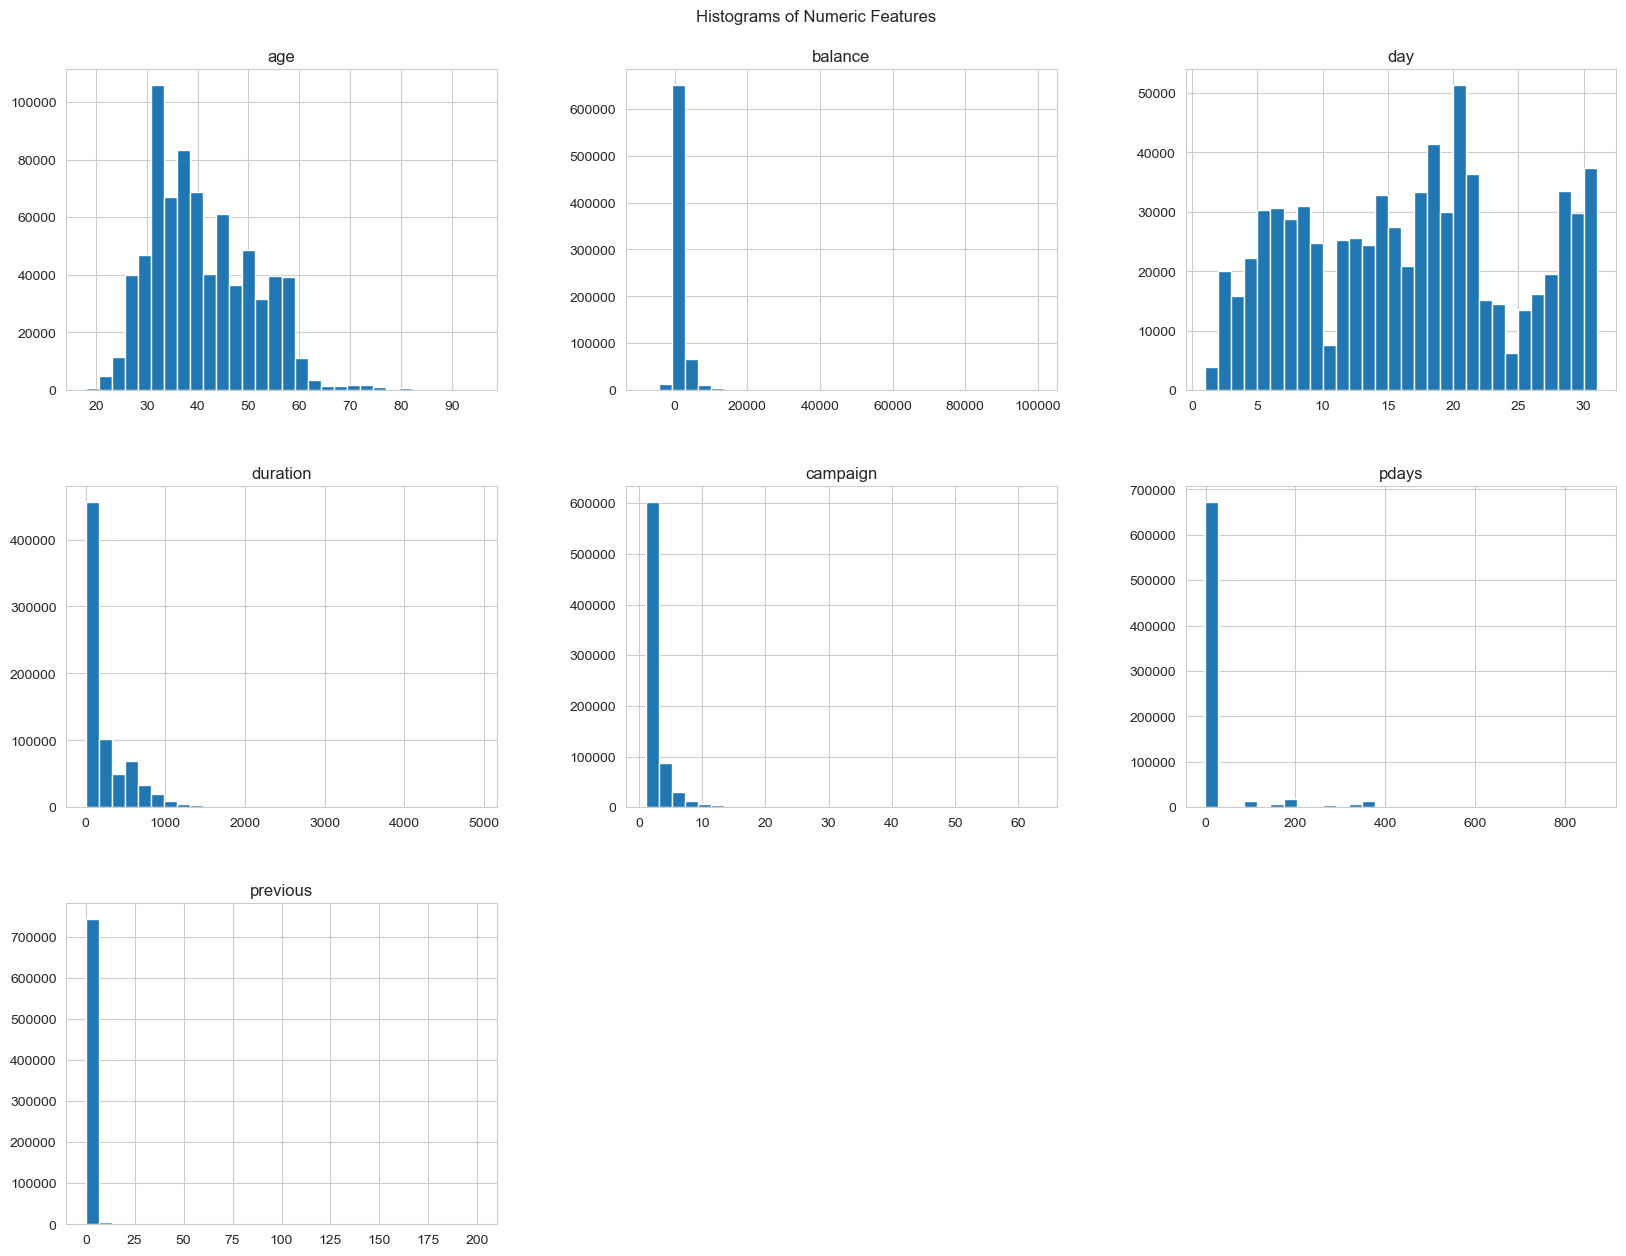

In [6]:
# Select numeric cols, excluding id and y
numeric_features = df_train.select_dtypes(include=np.number).columns.tolist()
numeric_features.remove('id')
numeric_features.remove('y')

# Plot histogram for each numeric feature
df_train[numeric_features].hist(bins=30, figsize=(20, 15), layout=(3, 3))
plt.suptitle('Histograms of Numeric Features', y=0.92)
plt.show()

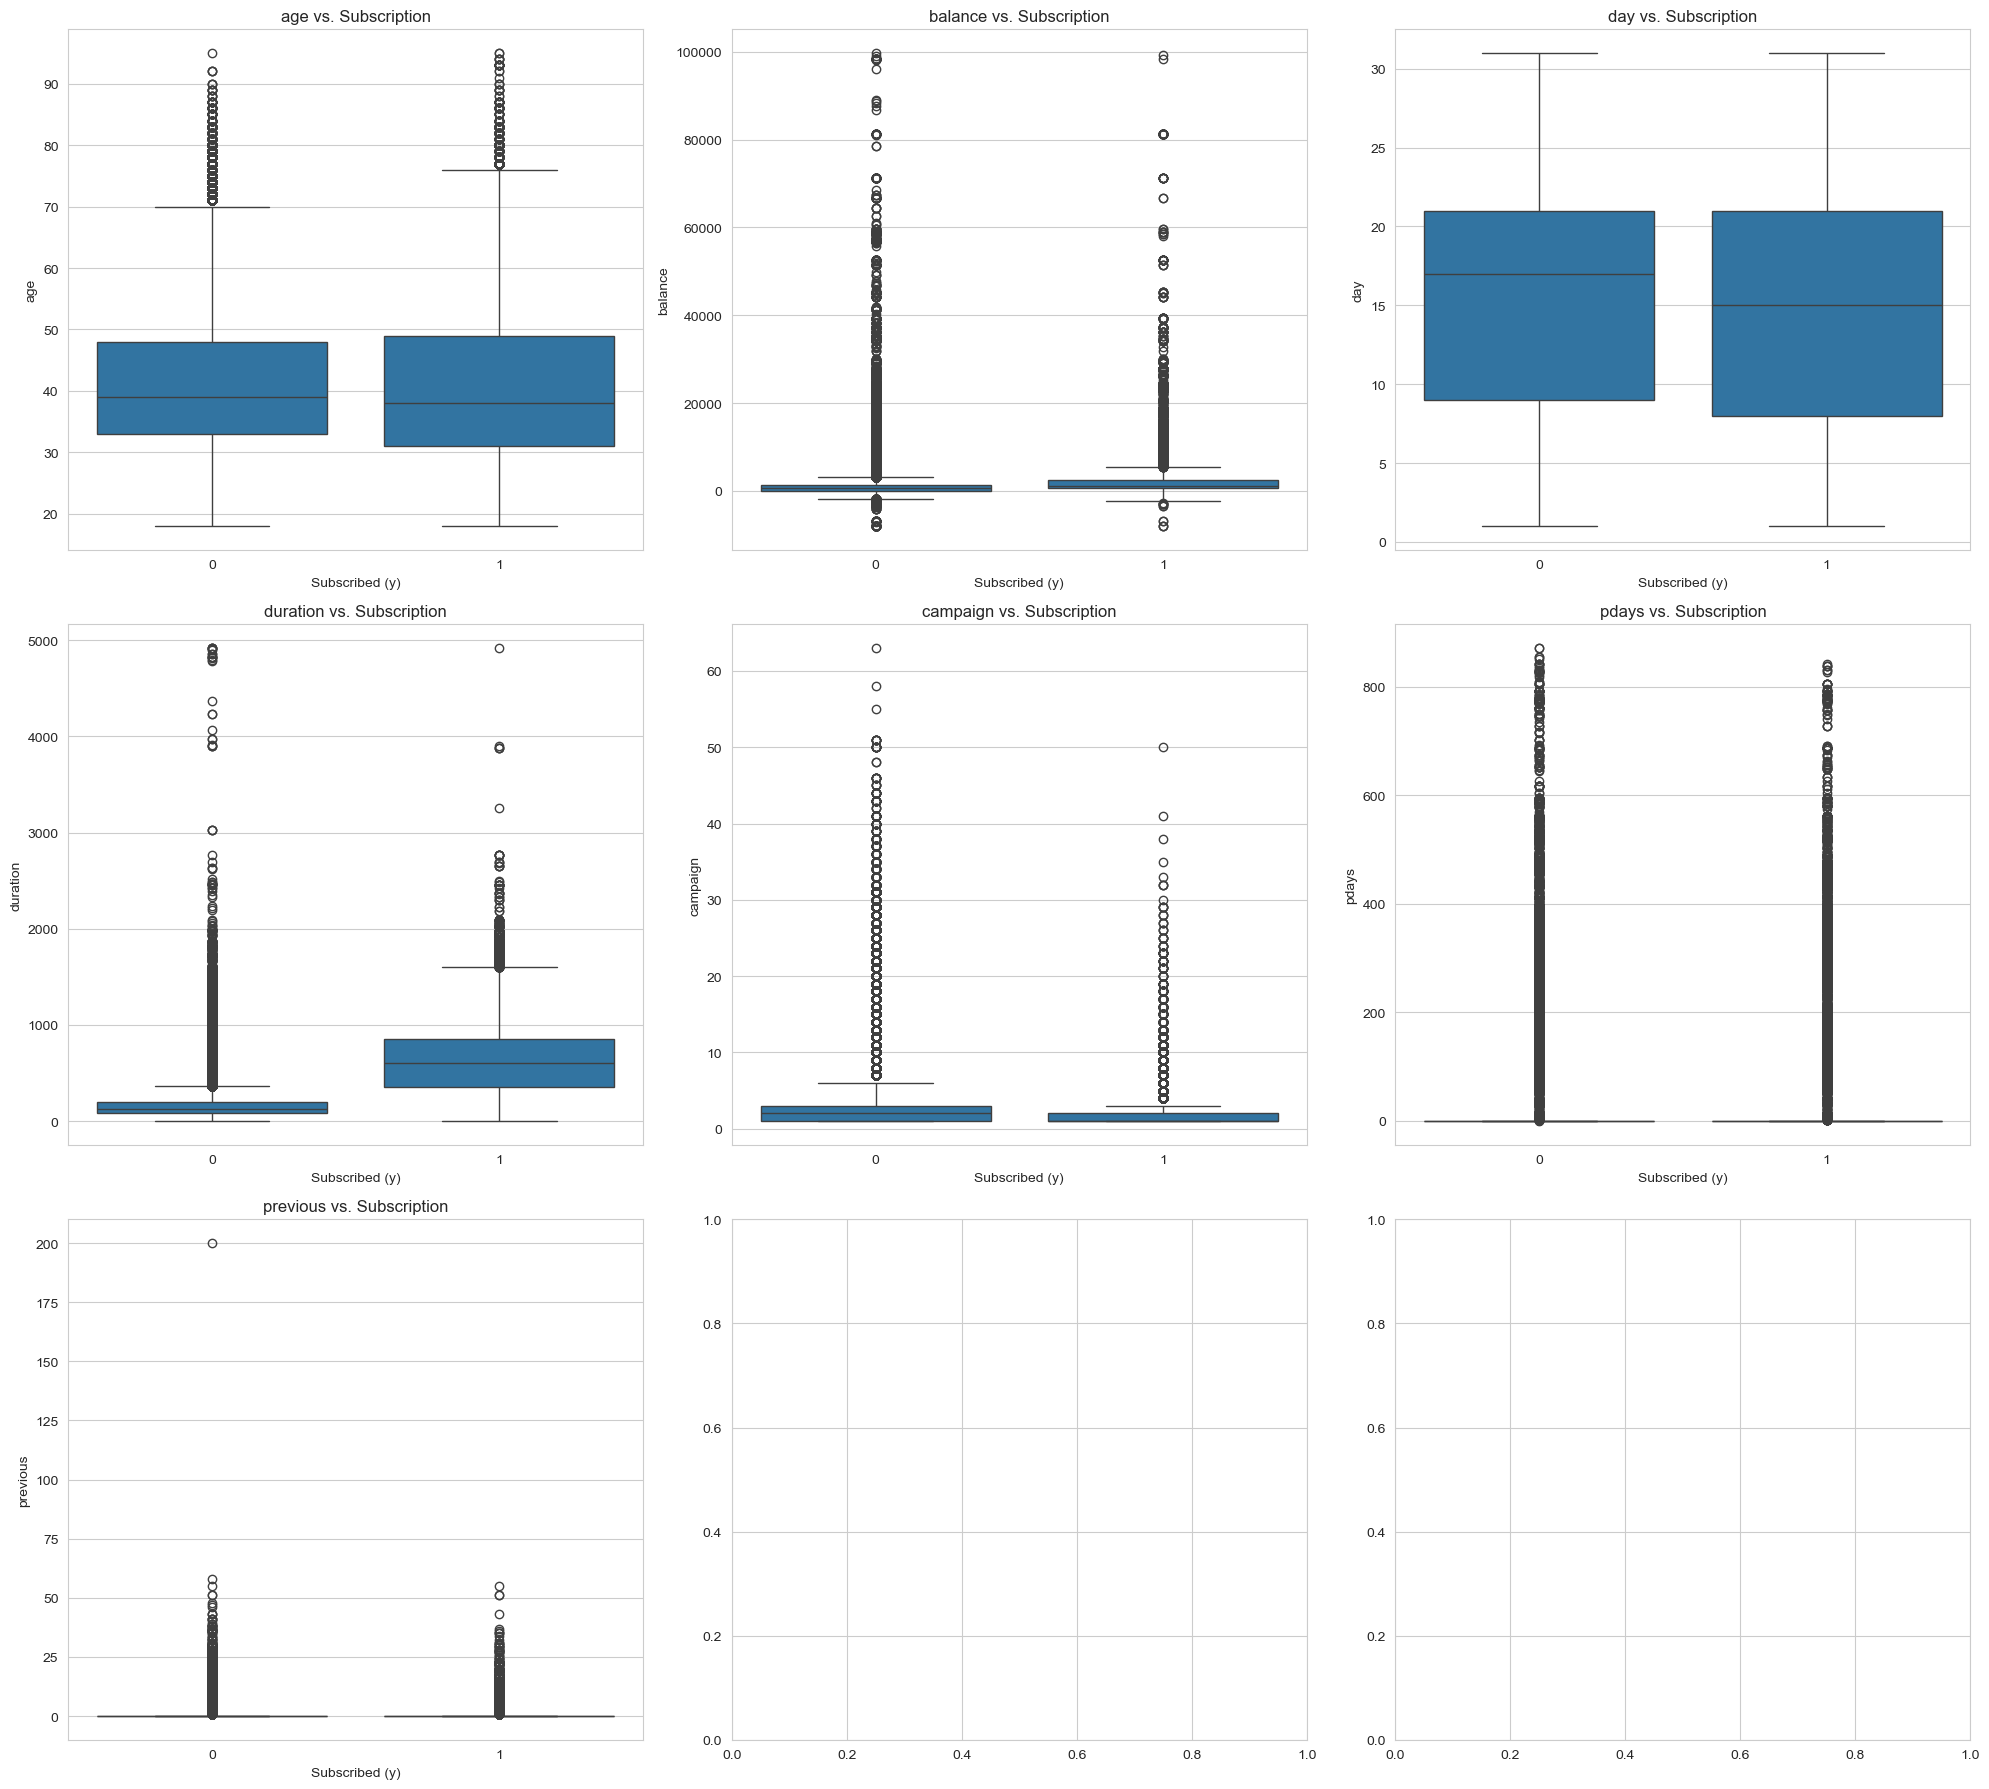

In [7]:
fig, axes = plt.subplots(3, 3, figsize=(20, 18))
axes = axes.flatten()

for i, col in enumerate(numeric_features):
    sns.boxplot(x='y', y=col, data=df_train, ax=axes[i])
    axes[i].set_title(f'{col} vs. Subscription')
    axes[i].set_xlabel('Subscribed (y)')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

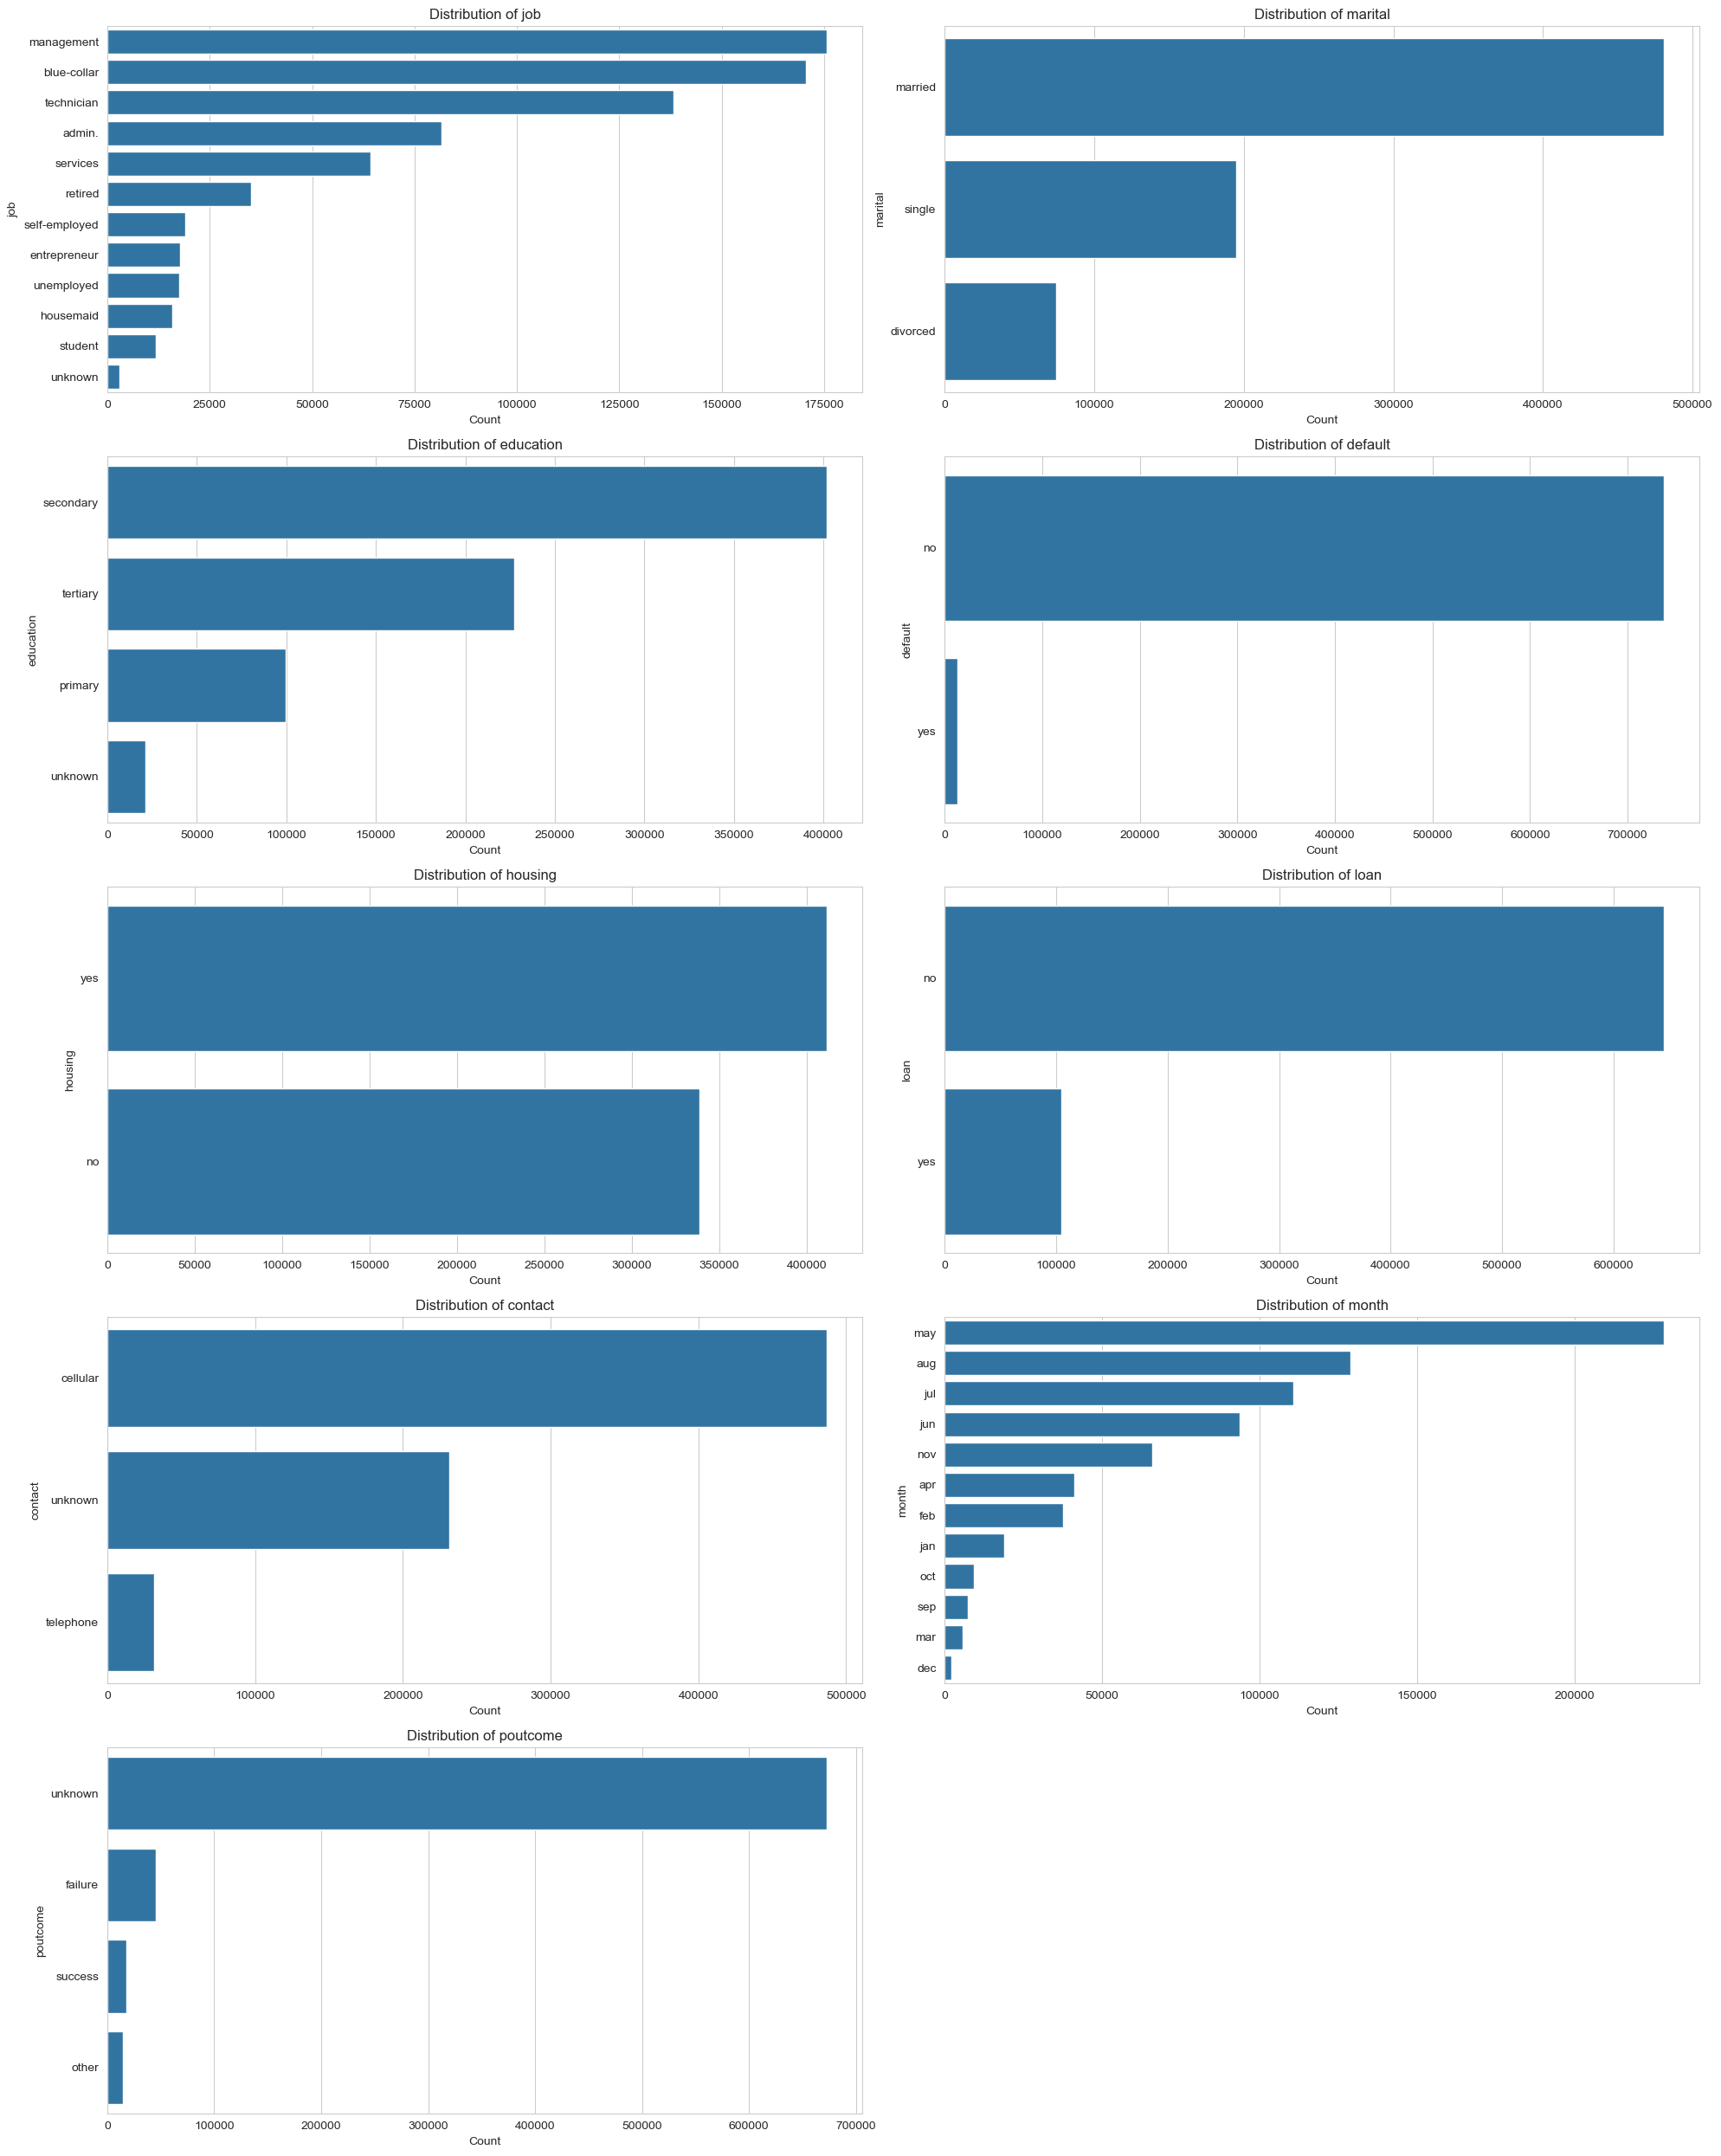

In [9]:
import math
import matplotlib.pyplot as plt

categorical_features = df_train.select_dtypes(include='object').columns.tolist()

# Calculate rows and cols dynamically (2 columns layout)
n_features = len(categorical_features)
n_cols = 2
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    sns.countplot(y=col, data=df_train, ax=axes[i], order=df_train[col].value_counts().index)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(col)

# Hide any extra empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


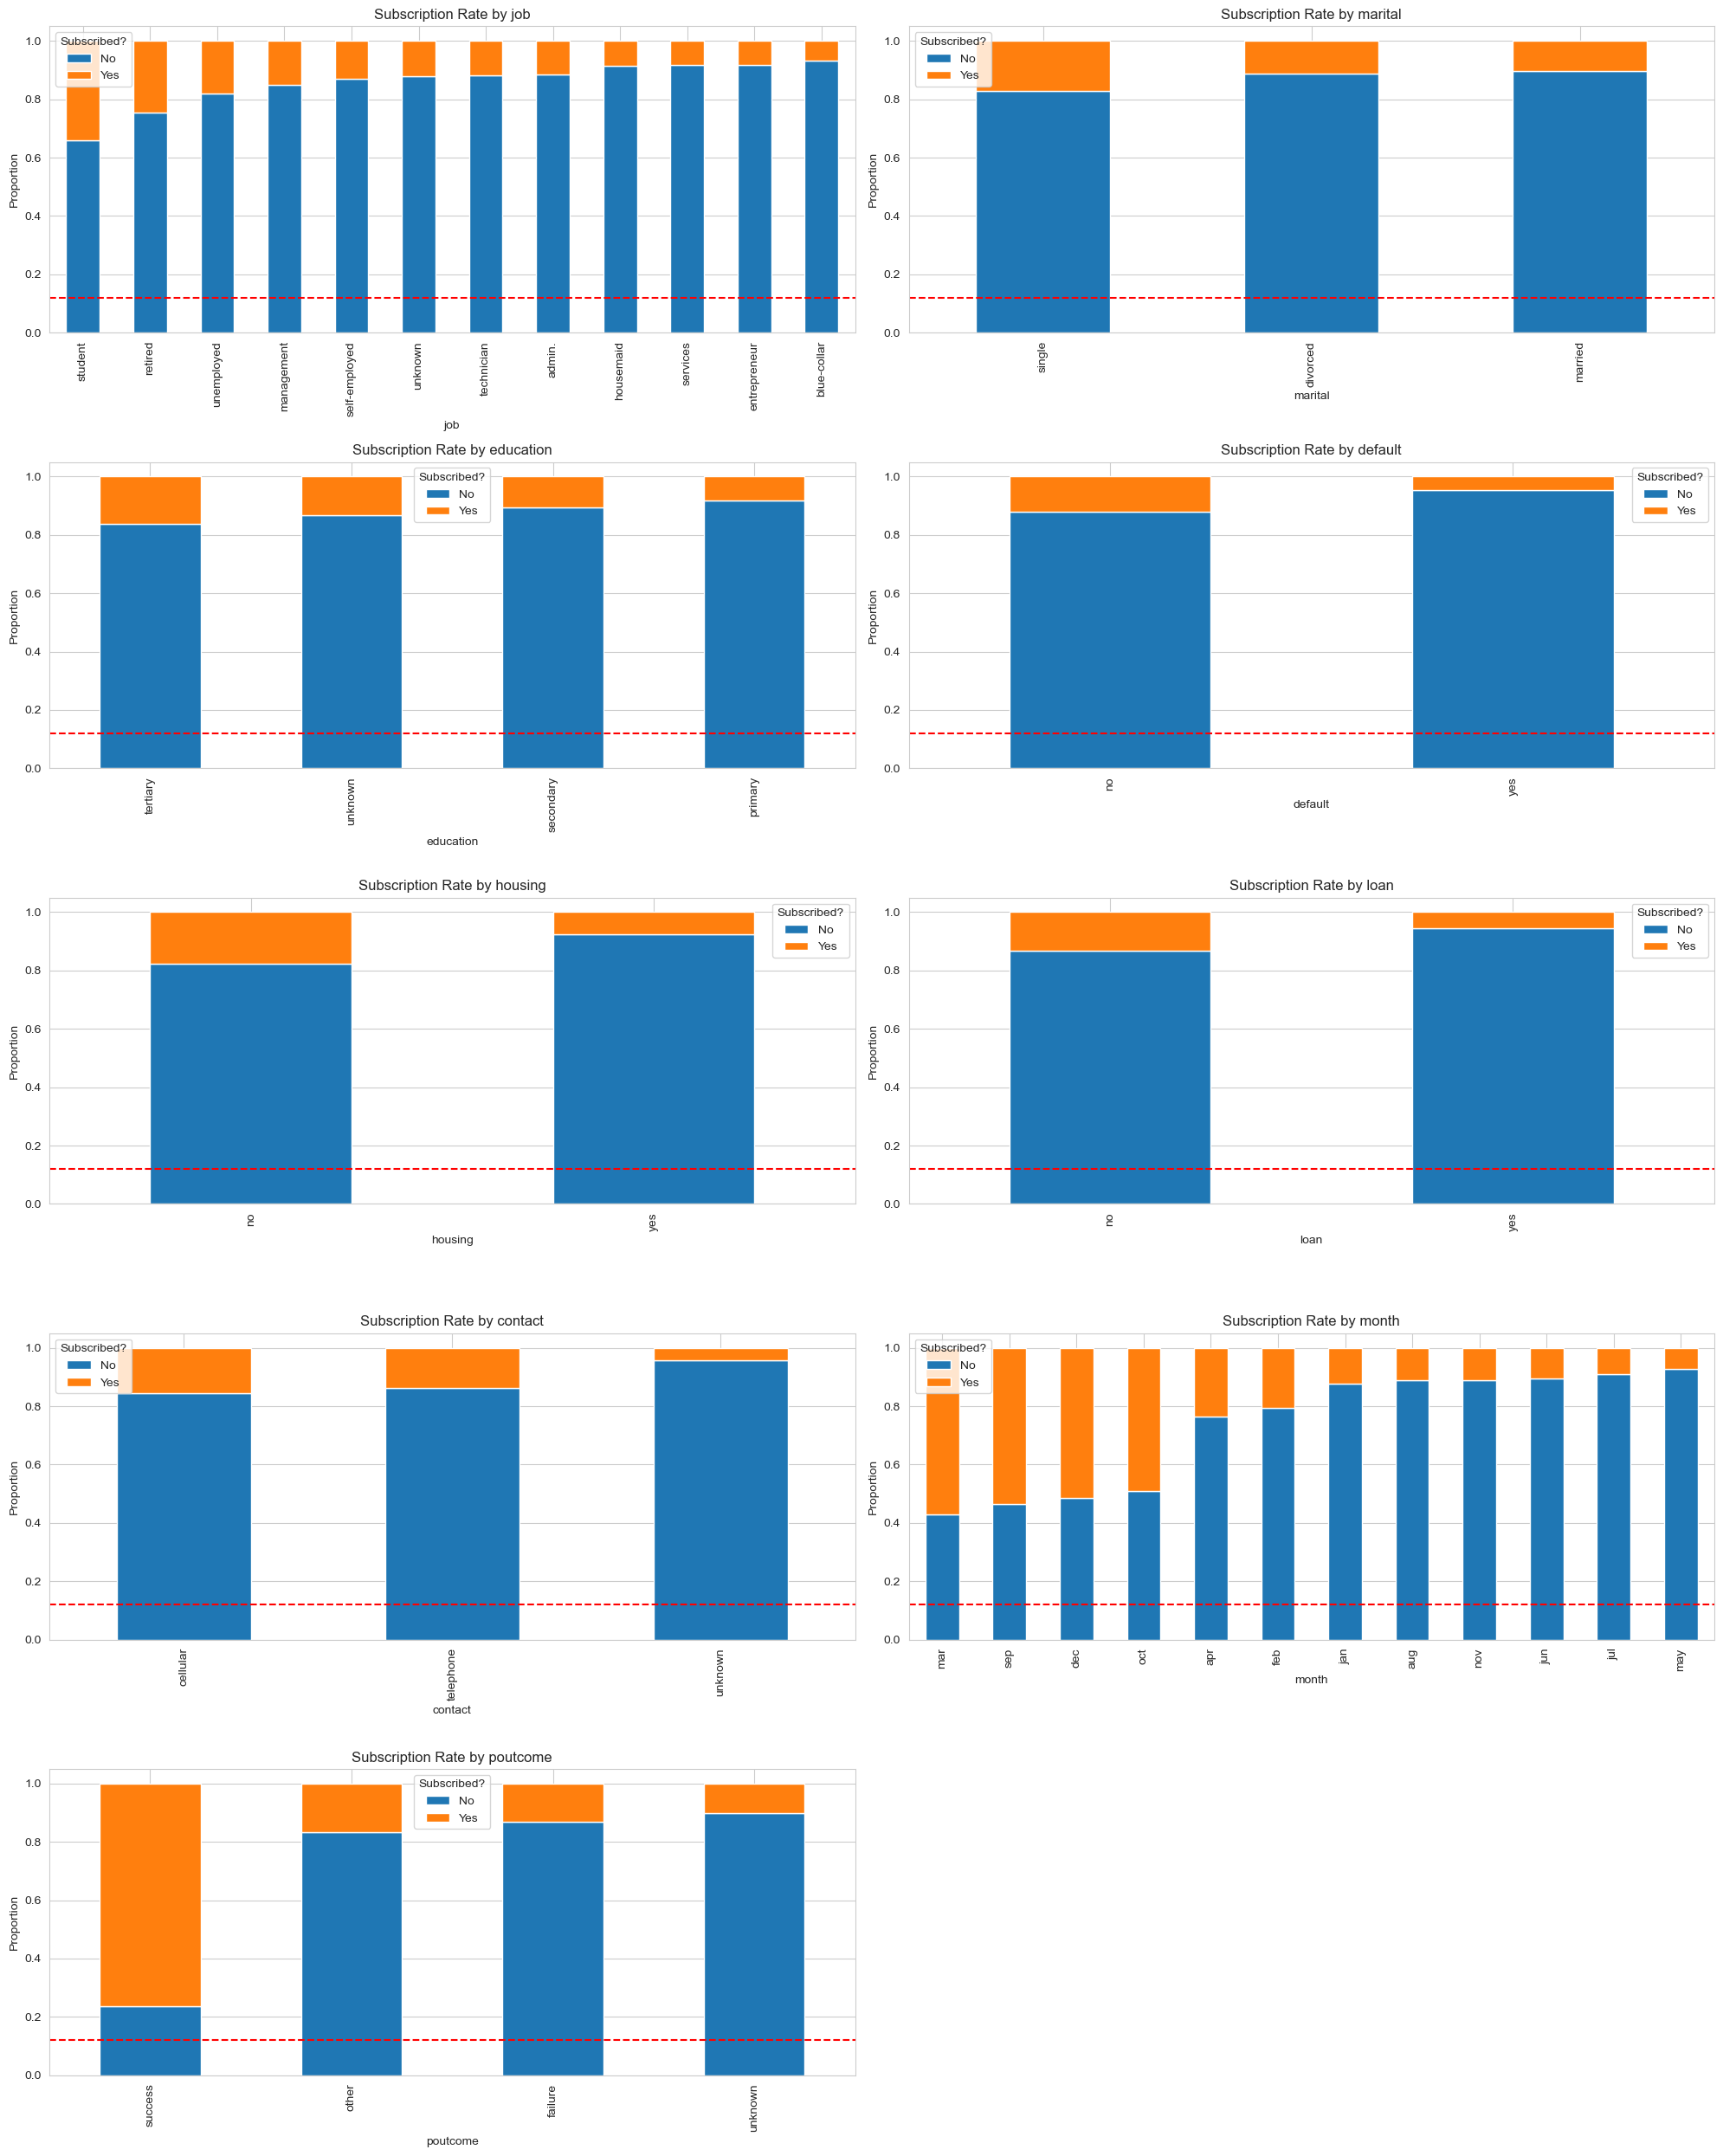

In [11]:
# Number of features
n_features = len(categorical_features)
n_cols = 2
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    prop_df = (
        df_train.groupby([col])['y']
        .value_counts(normalize=True)
        .unstack()
        .sort_values(by=1, ascending=False)
    )

    prop_df.plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_title(f'Subscription Rate by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Proportion')
    axes[i].legend(title='Subscribed?', labels=['No', 'Yes'])

    # Add horizontal line for average subscription rate
    axes[i].axhline(y=df_train['y'].mean(), color='r', linestyle='--', label='Avg. Rate')

# Remove unused subplot axes (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
